In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score


In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
298,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
299,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
300,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [4]:
data.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0       125   212    0        1      168      0      1.0   
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     61    1   0       148   203    0        1      161      0      0.0   
4     62    0   0       138   294    1        1      106      0      1.9   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
297   68    0   2       120   211    0        0      115      0      1.5   
298   44    0   2       108   141    0        1      175      0      0.6   
299   52    1   0       128   255    0        1      161      1      0.0   
300   59    1   3       160   273    0        0      125      0      0.0   
301   54    1   0       120   188    0        1      113      0      1.4   

     slope  ca  thal  target  
0        2   2     3    

In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
297    False
298    False
299    False
300    False
301    False
Length: 302, dtype: bool

In [7]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Checking the corelations

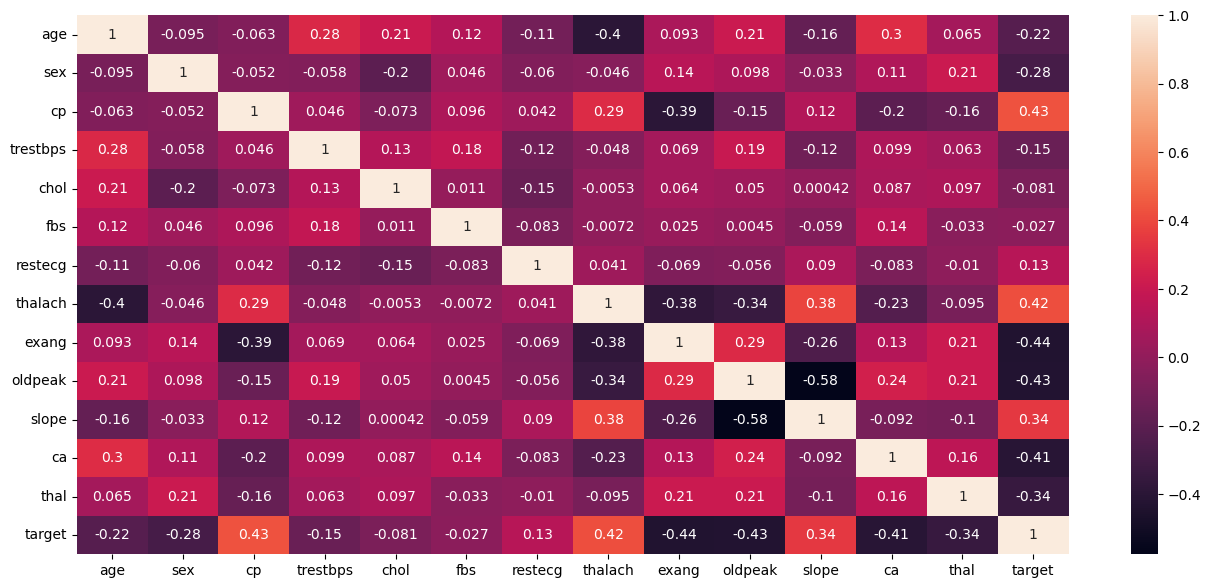

In [8]:
plt.figure(figsize=(16,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

### 10. How Many People Have Heart Disease, And How Many Don't Have Heart Disease In This Dataset?

In [9]:
data['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

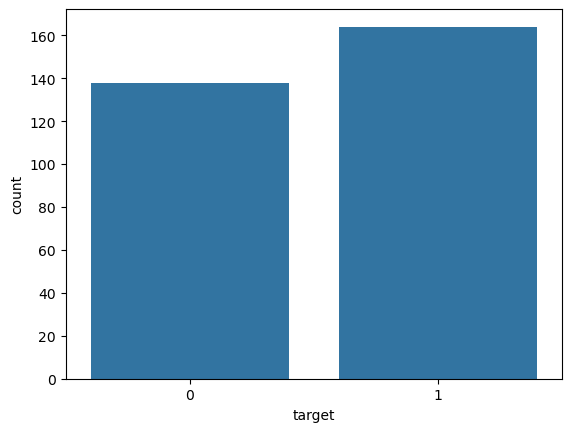

In [10]:
sns.countplot(x=data['target'])
plt.show()

### 11. Which Sex Has The Most Heart Disease [ Male or Female ]?

In [11]:
data['sex'].value_counts()

sex
1    206
0     96
Name: count, dtype: int64

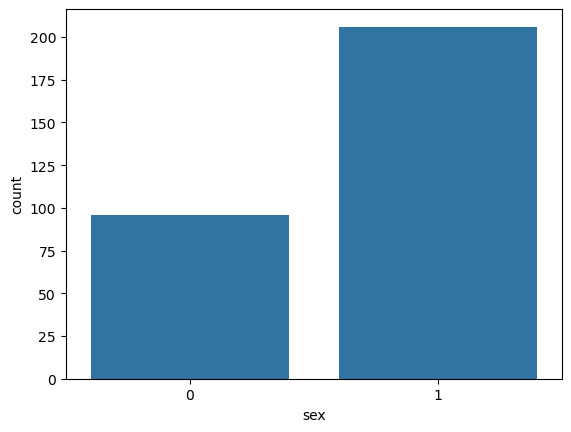

In [12]:
sns.countplot(x=data['sex'])
plt.show()

### 12. Find Gender Distribution According to The Target Variable.

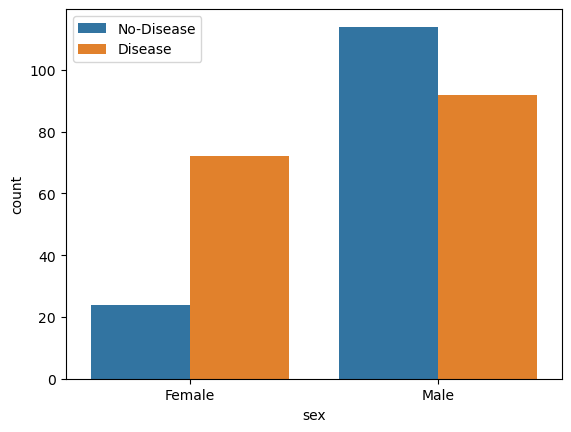

In [13]:
sns.countplot(x='sex',hue='target',data=data)
plt.xticks([1,0],['Male','Female'])
plt.legend(labels=['No-Disease','Disease'])
plt.show()

### 13. Check Age Distribution In The Dataset

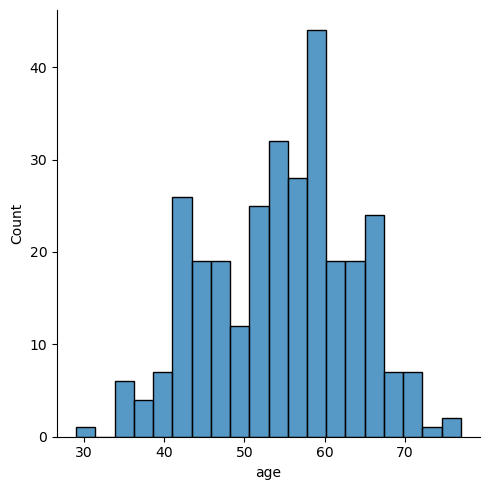

In [14]:
sns.displot(data['age'],bins=20)
plt.show()

### 14. Check Chest Pain Type

- chest pain type (4 values)
 - Value 0: typical angina
 - Value 1: atypical angina
 - Value 2: non-anginal pain
 - Value 3: asymptomatic 

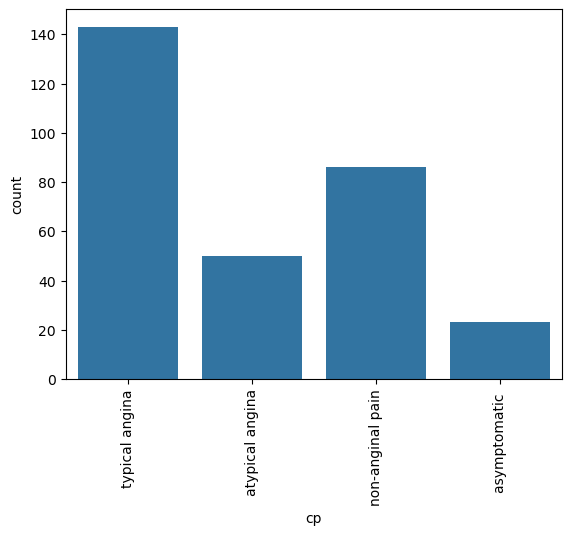

In [15]:
sns.countplot(x=data['cp'])
plt.xticks([0,1,2,3],["typical angina","atypical angina","non-anginal pain","asymptomatic "])
plt.xticks(rotation=90)
plt.show()

### 15. Show The Chest Pain Distribution As Per Target Variable

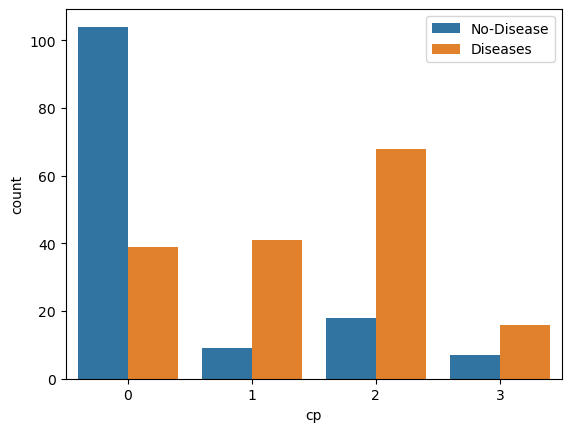

In [16]:
sns.countplot(x='cp',hue='target',data=data)
plt.legend(labels=['No-Disease','Diseases'])
plt.show()

### 16. Show Fasting Blood Sugar Distribution According To Target Variable

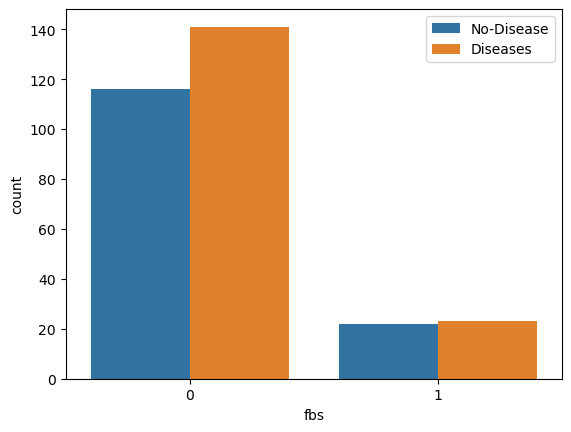

In [17]:
sns.countplot(x='fbs',hue='target',data=data)
plt.legend(labels=['No-Disease','Diseases'])
plt.show()

### 17 Compare Resting Blood Pressure As Per Sex Column

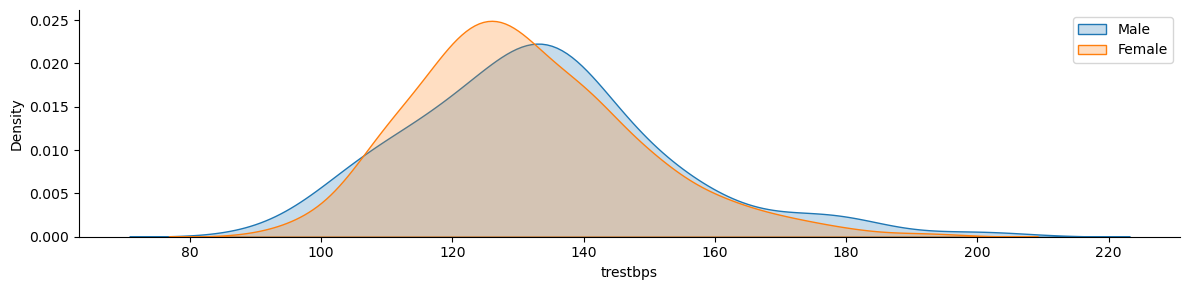

In [18]:
g = sns.FacetGrid(data,hue='sex',aspect=4)
g.map(sns.kdeplot,'trestbps',fill=True)
plt.legend(labels=['Male','Female'])
plt.show()

### 18. Show Distribution of Serum cholesterol

<Axes: >

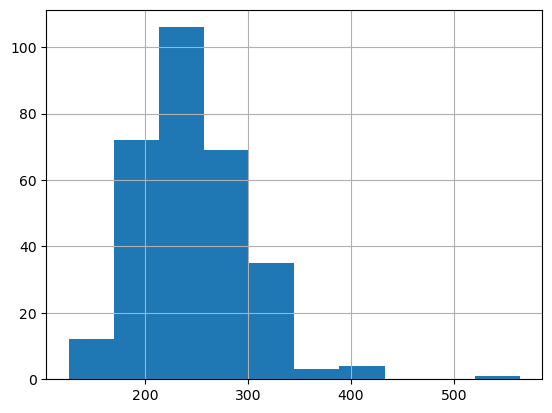

In [19]:
data['chol'].hist()

### 19. Plot Continuous Variables

In [20]:
cate_val = []
cont_val = []
for column in data.columns:
    if len(data[column].unique())<=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [21]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

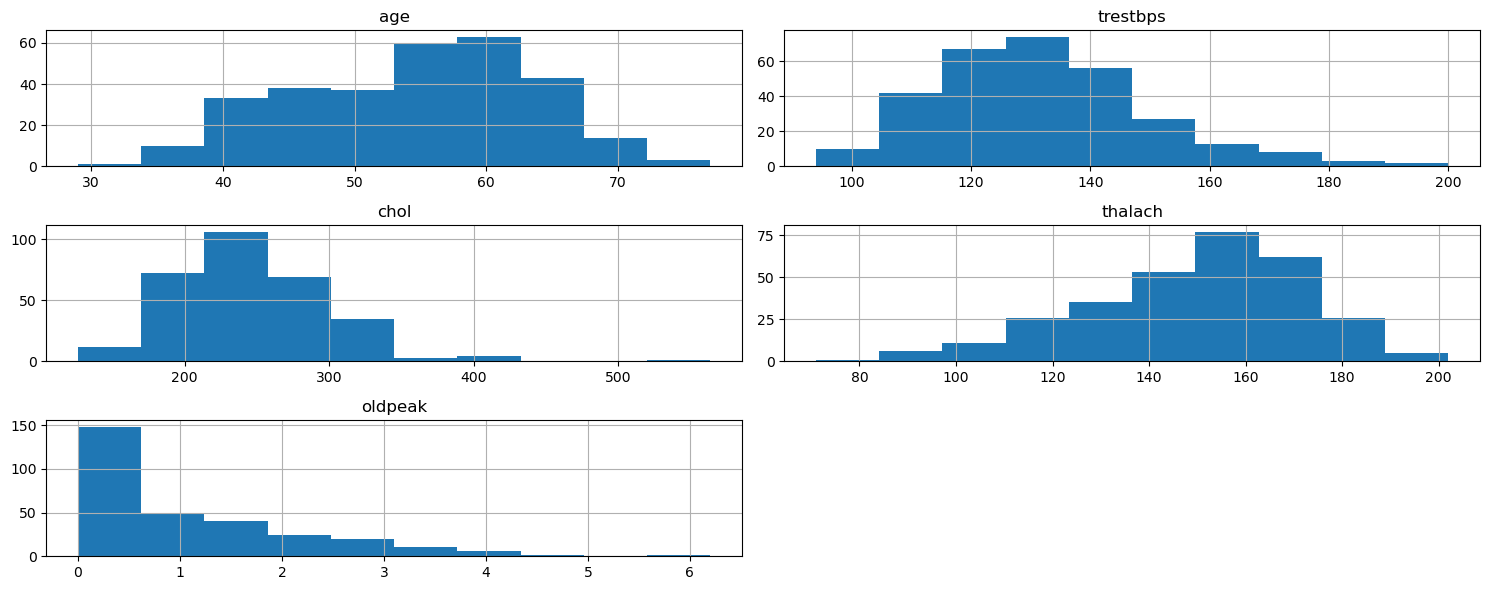

In [22]:
data.hist(cont_val,figsize=(15,6))
plt.tight_layout()
plt.show()

### Handling the ourtliers

Text(0.5, 1.0, 'OldPeak')

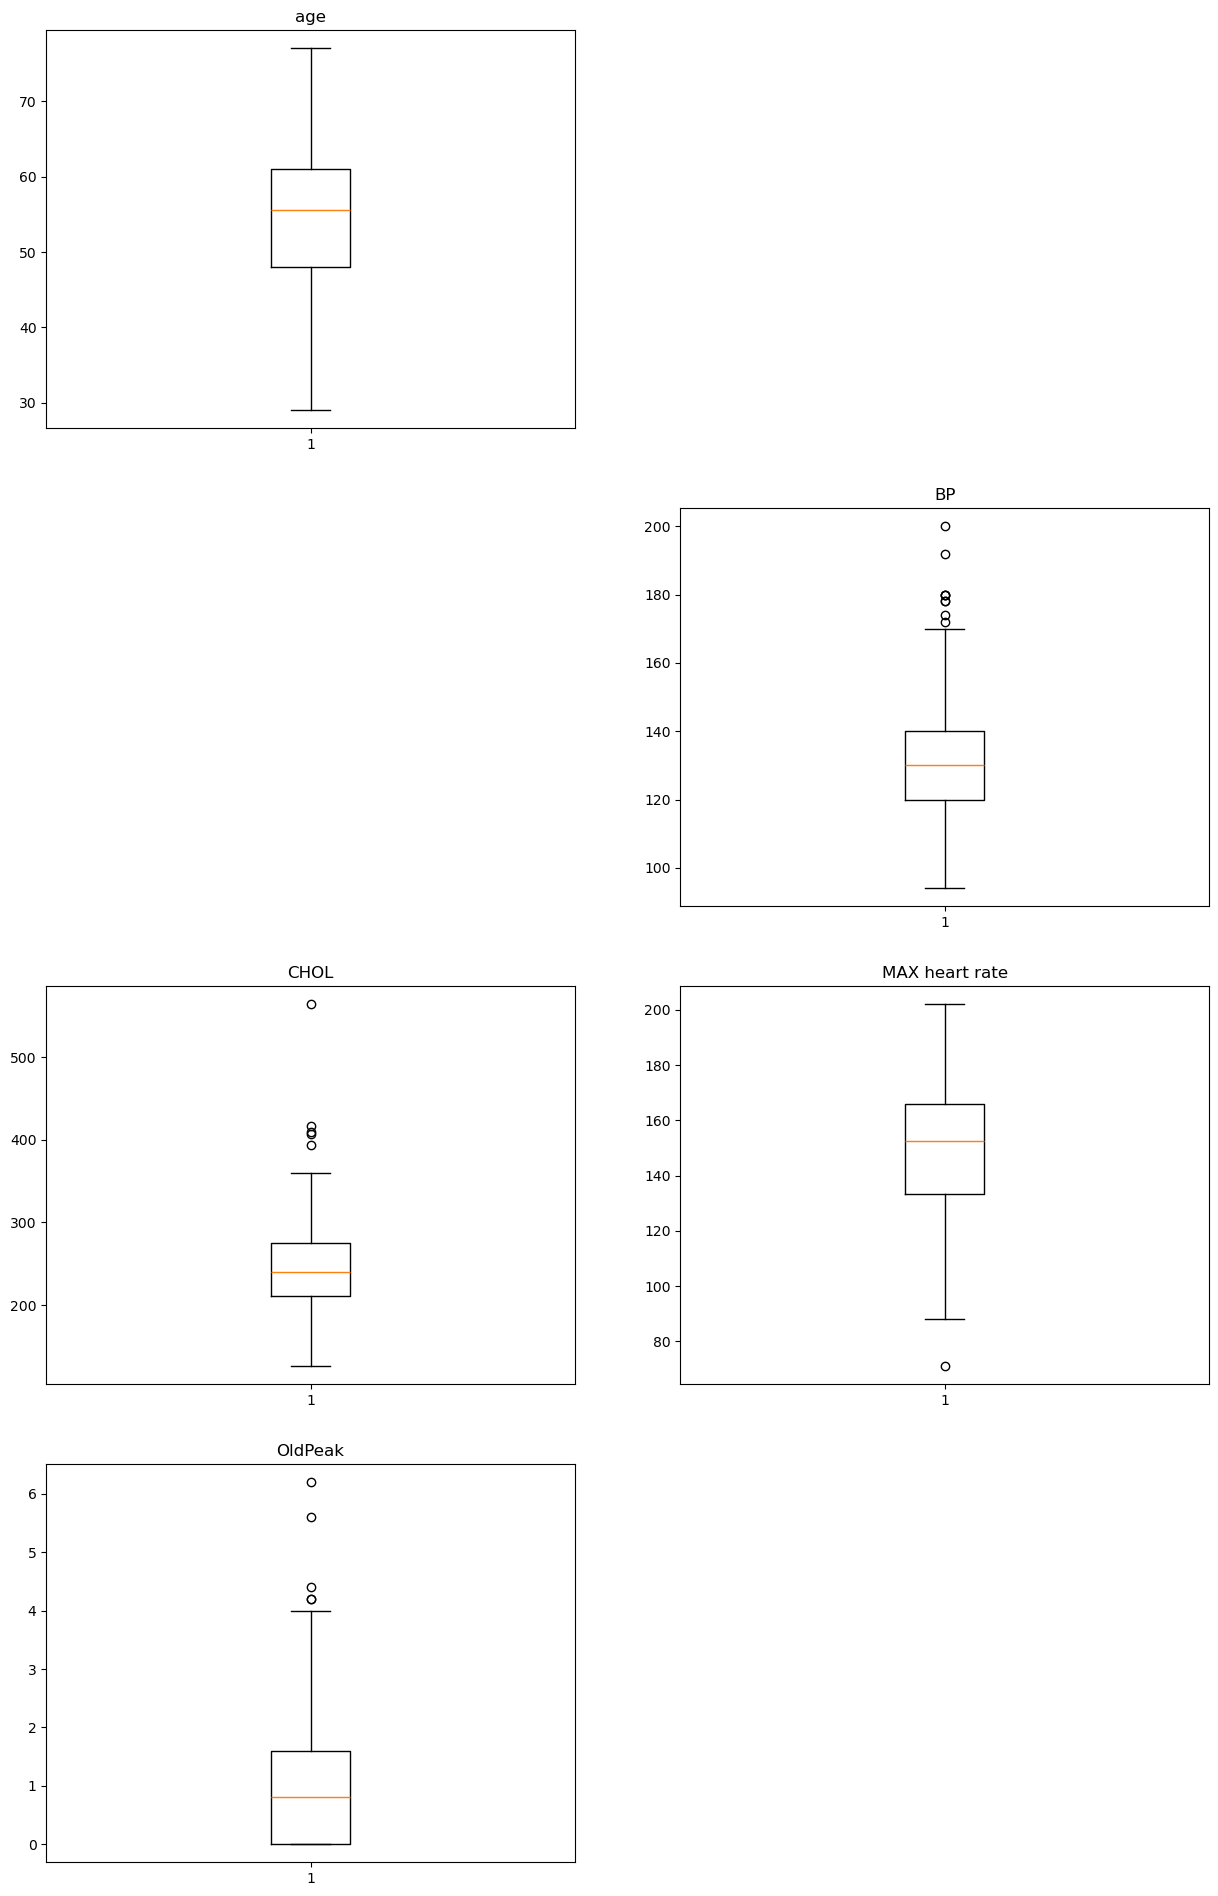

In [23]:
plt.figure(figsize = (15, 30))
ax=plt.subplot(521)
plt.boxplot(data['age'])
ax.set_title('age')
ax=plt.subplot(524)
plt.boxplot(data['trestbps'])
ax.set_title('BP')
ax=plt.subplot(525)
plt.boxplot(data['chol'])
ax.set_title('CHOL')
ax=plt.subplot(526)
plt.boxplot(data['thalach'])
ax.set_title('MAX heart rate')
ax=plt.subplot(527)
plt.boxplot(data['oldpeak'])
ax.set_title('OldPeak')

In [24]:
numerical_features=['trestbps','chol','oldpeak']
for cols in numerical_features:
    Q1 = data[cols].quantile(0.25)
    Q3 = data[cols].quantile(0.75)
    IQR = Q3 - Q1     
    filter = (data[cols] >= Q1 - 1.5 * IQR) & (data[cols] <= Q3 + 1.5 *IQR)
    data=data.loc[filter]

In [25]:
data = data[data['chol'] != 360]

Text(0.5, 1.0, 'OldPeak')

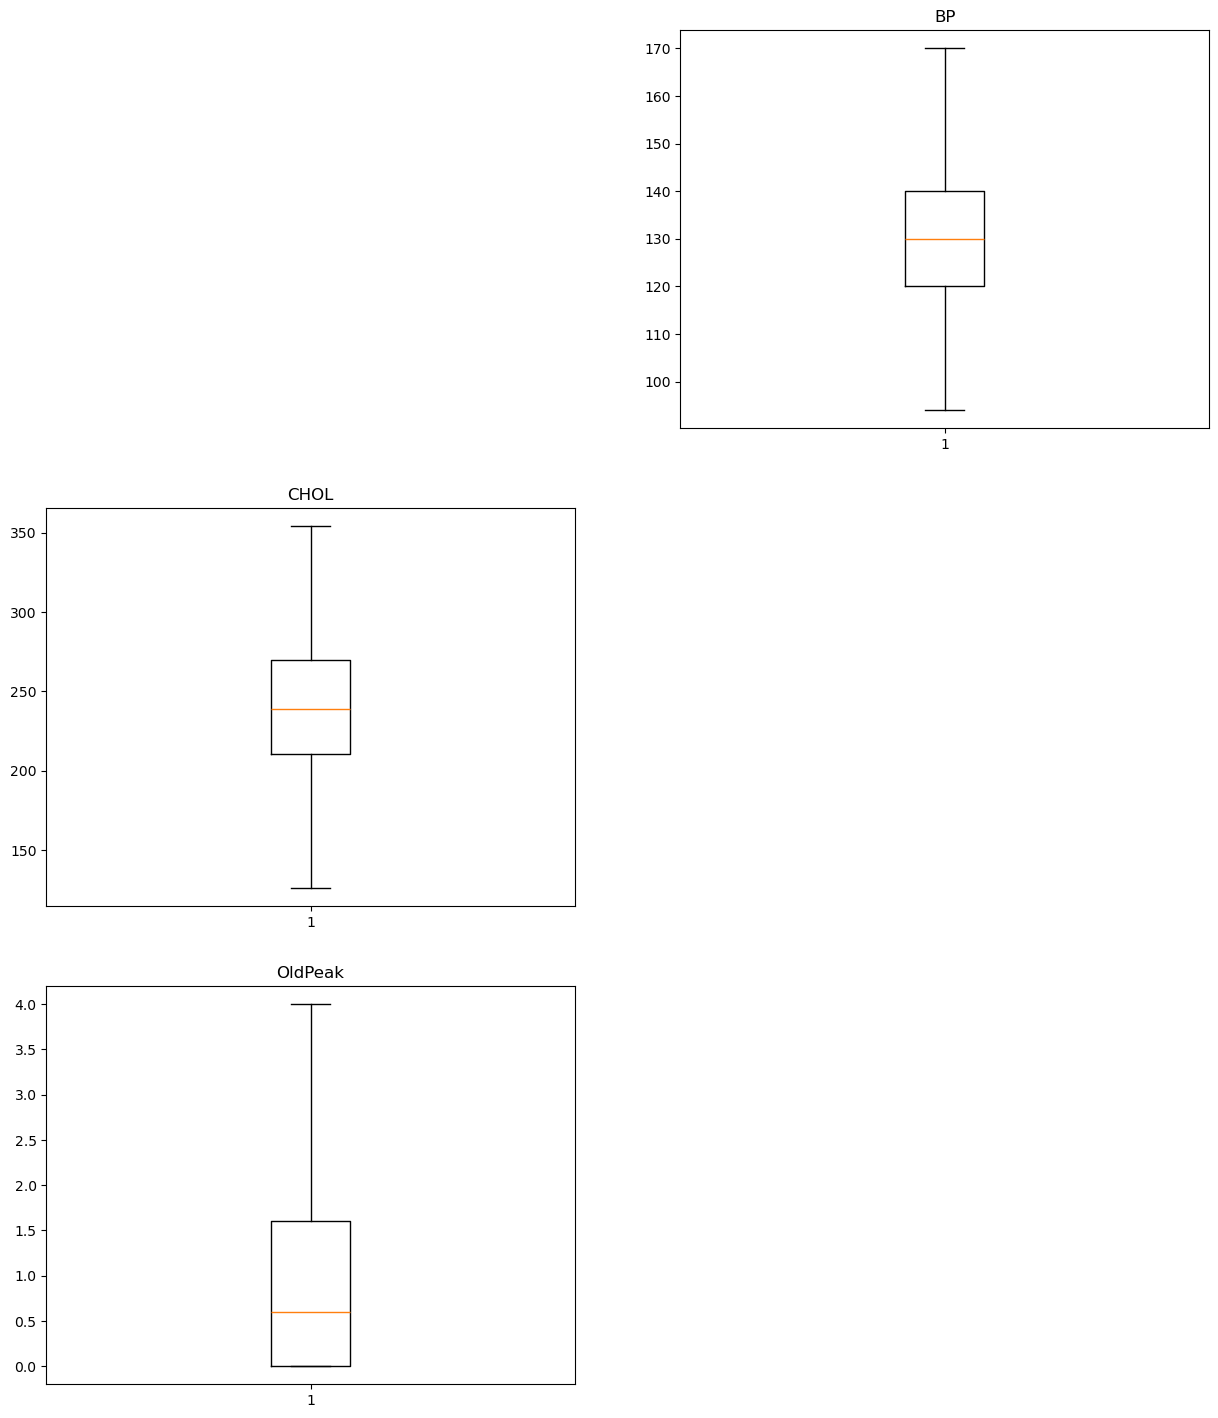

In [26]:
plt.figure(figsize = (15, 30))
ax=plt.subplot(524)
plt.boxplot(data['trestbps'])
ax.set_title('BP')
ax=plt.subplot(525)
plt.boxplot(data['chol'])
ax.set_title('CHOL')
ax=plt.subplot(527)
plt.boxplot(data['oldpeak'])
ax.set_title('OldPeak')

### Scaling the Featurs

In [27]:
from sklearn.preprocessing import StandardScaler

dataset_scale=data.copy()
O_variables=['sex','cp','fbs','restecg','exang','target']


feature_scale=[feature for feature in dataset_scale.columns if feature not in O_variables]


scaler=StandardScaler()
scaler.fit(dataset_scale[feature_scale])

StandardScaler()

In [28]:
scaled_dataset = pd.concat([dataset_scale[['sex','cp','fbs','restecg','exang','target']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(dataset_scale[feature_scale]), columns=feature_scale)],
                    axis=1)
scaled_dataset

,sex,cp,fbs,restecg,exang,target,age,trestbps,chol,thalach,oldpeak,slope,ca,thal
0,1,0,0,1,0,0,-0.225465,-0.310617,-0.678751,0.792082,0.046215,0.963570,1.325453,1.154055
1,1,0,1,0,1,0,-0.115832,0.671923,-0.883195,0.230063,2.095897,-2.382323,-0.707627,1.154055
2,1,0,0,1,1,0,1.747936,0.999436,-1.541959,-1.066904,1.607877,-2.382323,-0.707627,1.154055
3,1,0,0,1,0,0,0.761236,1.195944,-0.883195,0.489456,-0.929824,0.963570,0.308913,1.154055
4,0,0,1,1,0,0,0.870869,0.540918,1.183961,-1.888317,0.924650,-0.709376,2.341993,-0.487139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,0,2,0,0,0,1,1.528670,-0.638130,-0.701467,-1.499227,0.534235,-0.709376,-0.707627,-0.487139
279,0,2,0,1,0,1,-1.102533,-1.424162,-2.291587,1.094707,-0.344200,-0.709376,-0.707627,-0.487139
280,1,0,0,1,1,0,-0.225465,-0.114109,0.298037,0.489456,-0.929824,0.963570,0.308913,1.154055
281,1,3,0,0,0,0,0.541969,1.981976,0.706925,-1.066904,-0.929824,0.963570,-0.707627,-0.487139


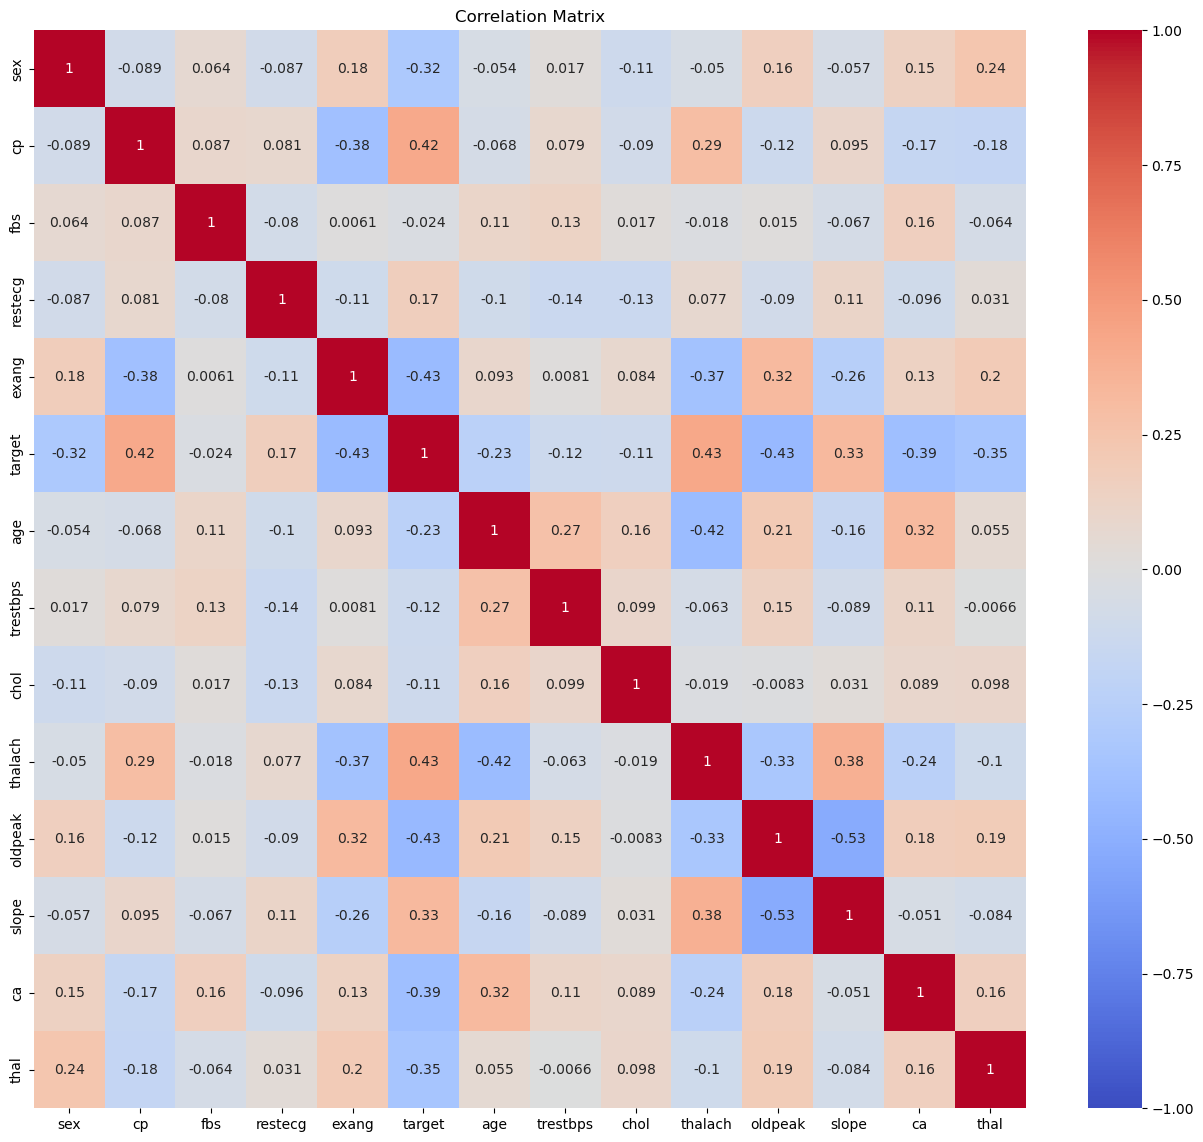

In [29]:
correlation_matrix = scaled_dataset.corr()

plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

### Building Model

In [30]:
X = data.drop(columns=['target'])  
Y = data['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,train_size=0.9,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",Y_train.shape)
print("Output Test:",Y_test.shape)

Input Training: (254, 13)
Input Test: (29, 13)
Output Training: (254,)
Output Test: (29,)


In [31]:
from sklearn.ensemble import RandomForestClassifier

model4 = RandomForestClassifier(n_estimators=100)
model4.fit(X_train, Y_train)

RandomForestClassifier()

### Random Forest

In [32]:
model4 = RandomForestClassifier()
model4.fit(X_train, Y_train)
Y_pred = model4.predict(X_test)
acc = model4.score(X_test,Y_test)
print(f"Accuracy : {acc}")

Accuracy : 0.7931034482758621


In [33]:
print('Classification Report')
print(classification_report(Y_test, Y_pred))
print()

print('Confusion Matrix')
print(confusion_matrix(Y_test, Y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.82      0.82      0.82        17

    accuracy                           0.79        29
   macro avg       0.79      0.79      0.79        29
weighted avg       0.79      0.79      0.79        29


Confusion Matrix
[[ 9  3]
 [ 3 14]]


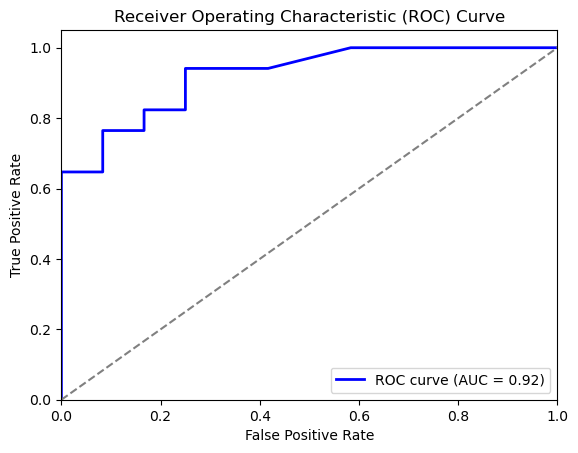

In [34]:
from sklearn.metrics import roc_curve, auc

y_probs = model4.predict_proba(X_test)[:, 1]  # Get probabilities for class 1
fpr, tpr, _ = roc_curve(Y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()